In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

In [37]:
font = {'size'   : 18}
matplotlib.rc('font', **font)

In [38]:
DIFF = "\u0394diff"
ABS_DIFF = "\u0394abs"
SQR_DIFF = "\u0394sq"
KL_DIV = "\u0394KL"

metrics = [
    DIFF, 
    ABS_DIFF,
    SQR_DIFF,
    KL_DIV
]

In [39]:
N = 100 # items in ranking

In [40]:
# Implemenations of fairness metrics defined in [Kırnap et al., 2021]

def delta(n, protected, k, p, metric):
    pi = np.array([x for x in range(n)]) #ranking of n elements
    top_k = pi[:k]             # top k elements in the ranking    
    protected_k = np.array(protected)[np.isin(protected, top_k)] #the protected elements in the top k 
    len_pro_k = len(protected_k)
    non_protected_k = top_k[~np.isin(top_k, protected_k)]    
    len_non_pro_k = len(non_protected_k)
    
    if metric == DIFF:
        return (p - len_pro_k / k) + (1 - p - len_non_pro_k / k)
    elif metric == ABS_DIFF:
        return abs(p - len_pro_k / k) + abs(1 - p - len_non_pro_k / k)
    elif metric == SQR_DIFF:
        return (p - len_pro_k / k) ** 2 + (1 - p - len_non_pro_k / k) ** 2
    elif metric == KL_DIV:
        if len_pro_k == 0 or len_non_pro_k == 0:
            return float('inf')
        return (p * math.log(p / (len_pro_k / k))) + ((1 - p) * math.log((1 - p) / (len_non_pro_k / k)))

In [41]:
def fairness_of_rankings_with_protected_indeces(p, pro_index, k):    
    test_ranking = [x for x in range(N)]
    results = {}
    for metric in metrics:
        results[metric] = []
    
    for i in range(1, N):   
        for metric in metrics:
            results[metric].append(delta(N, pro_index[:i], k, p, metric))

    return results


In [79]:
def plot_results(results_to_plot, title, savetofile):
    fig, axes = plt.subplots(1, 4, sharey=True,sharex=True, figsize=(17.5,4.5), constrained_layout=True)
    axes = axes.ravel()

    fig.text(0.5, -0.05, 'Proportion of protected group (%)', ha='center')
    fig.text(-0.02, 0.5, 'Fairness Score', va='center', rotation=90)

    for i, metric in enumerate(metrics):
        axes[i].plot(list(range(1, N)), results_to_plot[metric])
        axes[i].set_title(metric)
        axes[i].grid()
        axes[i].set_ylim(-0.2, 1.5)

    fig.suptitle(title, fontsize=16)
    plt.savefig(savetofile, bbox_inches='tight')
    plt.show()

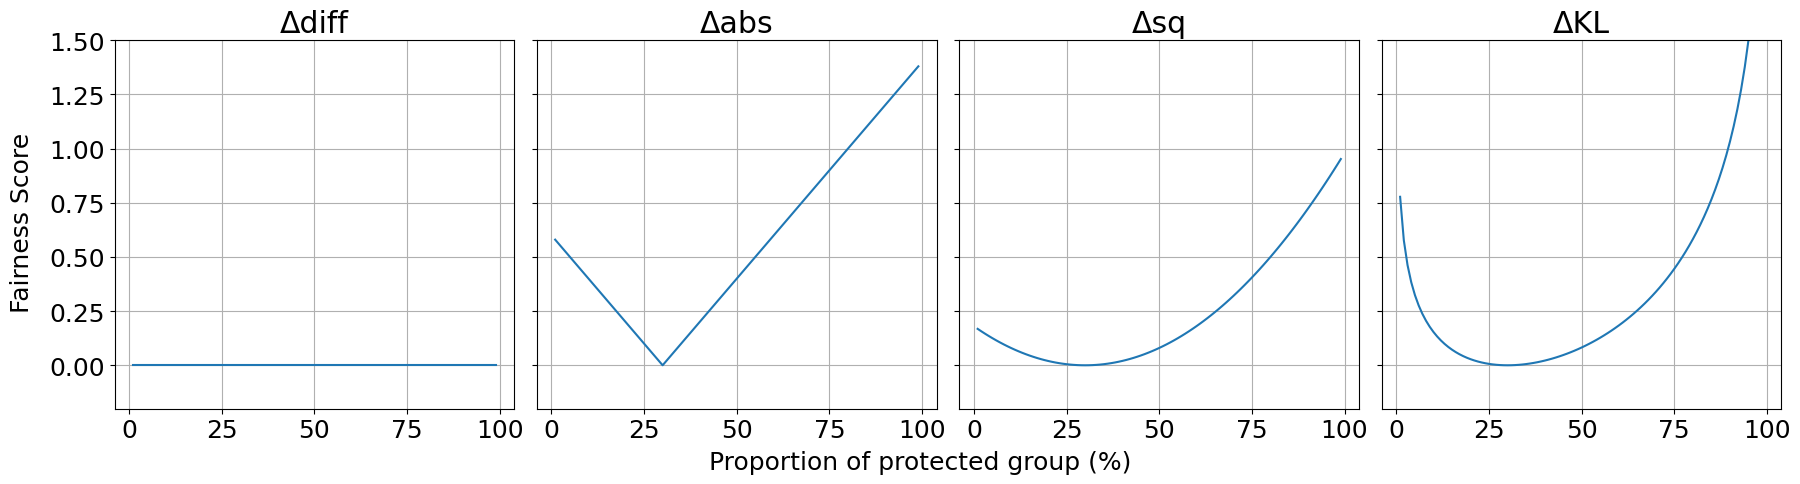

In [80]:
protected = [x for x in range(N)]
results = fairness_of_rankings_with_protected_indeces(.3, protected, 100)
plot_results(results, "", "kirnap_etal")

## References: 

[Kırnap et al., 2021] Kırnap,  ̈O., Diaz, F., Biega, A., Ekstrand, M.,
Carterette, B., and Yilmaz, E. (2021). Estimation of fair ranking metrics
with incomplete judgments. In Proceedings of the Web Conference 2021,
pages 1065–1075.

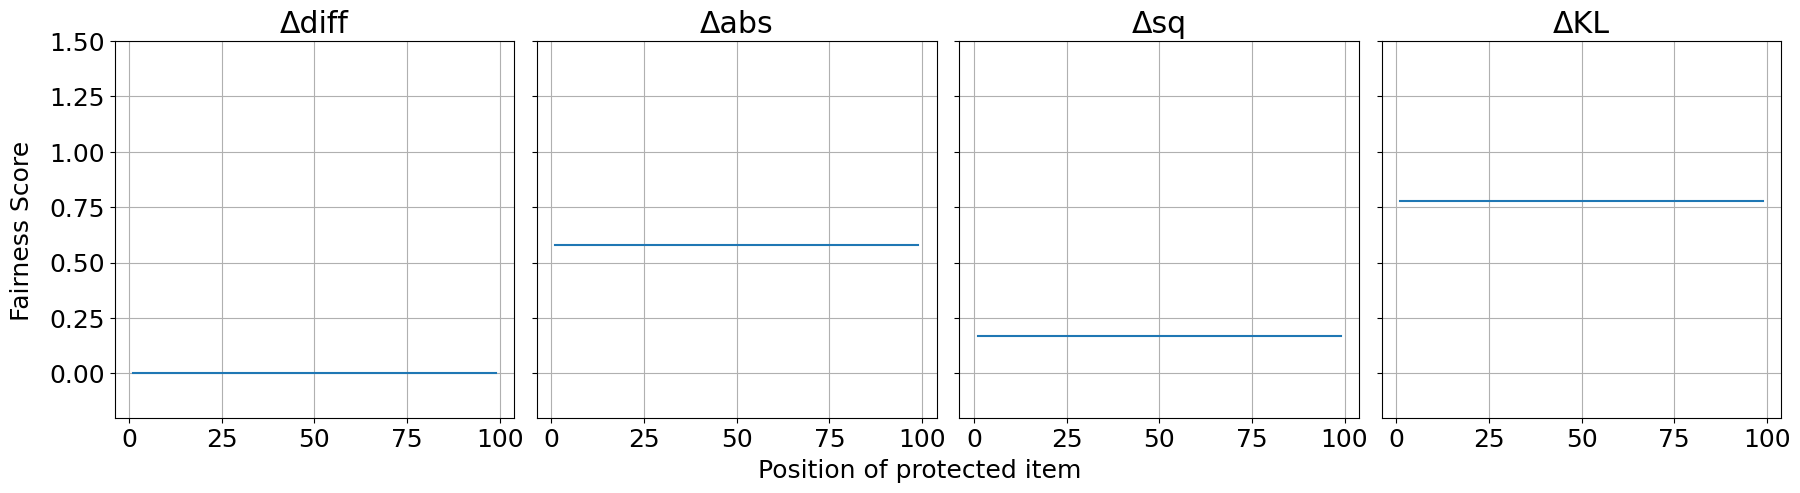

In [81]:
test_ranking = [x for x in range(100)]
results_test1 = {}
for metric in metrics:
    results_test1[metric] = []

for i in range(1, N):   
    for metric in metrics:
        results_test1[metric].append(delta(N, i, 100, 0.3, metric))

fig, axes = plt.subplots(1, 4, sharey=True,sharex=True, figsize=(17.5,4.5), constrained_layout=True)
axes = axes.ravel()

fig.text(0.5, -0.05, 'Position of protected item', ha='center')
fig.text(-0.02, 0.5, 'Fairness Score', va='center', rotation=90)

for i, metric in enumerate(metrics):
    axes[i].plot(list(range(1, N)), results_test1[metric])
    axes[i].set_title(metric)
    axes[i].grid()
    axes[i].set_ylim(-0.2, 1.5)

#fig.suptitle(title, fontsize=16)
plt.savefig('kirnap_etal_test1', bbox_inches='tight')
plt.show()